In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

import pandas as pd

In [13]:
# Define filepath
filepath = '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/'

#xds = xarray.open_dataset(filepath + '*.nc', decode_coords='all')

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'ESA_10.nc'))
print(files)

['/Users/jimwy/OneDrive/Documents/FutureOfCoffee/ESA_10.nc']


In [14]:
import rasterio as rio
cclim = xarray.open_dataset(files[0], engine='rasterio') # , decode_times = False

In [15]:
cclim_lst = []

for i in range(0, len(files)):
    cclim_lst.append(xarray.open_dataset(files[i], engine='rasterio'))

In [16]:
cclim

<xarray.Dataset>
Dimensions:      (y: 137, x: 233, time: 132)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 ...
Data variables:
    t2m          (time, y, x) float32 ...
    tp           (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-04 18:52:52 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [31]:
t2mf = (cclim['t2m'] - 273.15) * 9/5 + 32

In [102]:
cclim['tp']


<xarray.DataArray 'tp' (time: 132, y: 137, x: 233)>
array([[[3.370941e-04, 4.263222e-04, ..., 5.058318e-03, 5.101942e-03],
        [2.716556e-04, 3.430396e-04, ..., 4.856065e-03, 4.830290e-03],
        ...,
        [5.532280e-04, 5.651191e-04, ..., 8.913033e-03, 8.984417e-03],
        [5.809814e-04, 5.710721e-04, ..., 9.030022e-03, 9.357195e-03]],

       [[2.740338e-03, 3.650479e-03, ..., 1.618028e-03, 1.697347e-03],
        [2.492476e-03, 3.374856e-03, ..., 1.522854e-03, 1.592249e-03],
        ...,
        [1.132227e-03, 1.203611e-03, ..., 1.139163e-02, 1.151655e-02],
        [1.326546e-03, 1.382068e-03, ..., 1.198054e-02, 1.189329e-02]],

       ...,

       [[2.577901e-05, 2.577901e-05, ..., 3.600907e-03, 3.470037e-03],
        [4.759431e-05, 4.759431e-05, ..., 3.259853e-03, 3.132947e-03],
        ...,
        [3.113151e-04, 3.370941e-04, ..., 8.974500e-03, 8.550167e-03],
        [3.311411e-04, 3.430396e-04, ..., 9.166840e-03, 8.587841e-03]],

       [[2.571791e-03, 3.035787e-03, ..., 3.097255e-03, 3.091305e-03],
        [2.337813e-03, 2.645161e-03, ..., 3.358994e-03, 3.305458e-03],
        ...,
        [5.076155e-04, 5.175322e-04, ..., 1.049338e-02, 1.054097e-02],
        [5.571917e-04, 5.274490e-04, ..., 1.076901e-02, 1.045968e-02]]],
      dtype=float32)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0
Attributes:
    long_name:  Total precipitation
    units:      ('m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', ...

In [32]:
t2mf

<xarray.DataArray 't2m' (time: 132, y: 137, x: 233)>
array([[[57.571667, 56.316315, 55.046898, ..., 65.08055 , 65.11983 ,
         65.18338 ],
        [57.54365 , 56.41162 , 55.67691 , ..., 65.29555 , 65.3273  ,
         65.38992 ],
        [57.504375, 57.07624 , 56.13026 , ..., 65.51709 , 65.545105,
         65.58064 ],
        ...,
        [72.96983 , 72.977356, 72.980156, ..., 78.11379 , 76.86871 ,
         76.72474 ],
        [73.125015, 73.127815, 73.125015, ..., 78.45124 , 77.45198 ,
         76.535   ],
        [73.27926 , 73.297005, 73.289536, ..., 77.575356, 77.45571 ,
         76.78082 ]],

       [[55.026356, 53.462505, 51.4341  , ..., 64.08969 , 64.13177 ,
         64.17758 ],
        [55.32546 , 53.905586, 52.520264, ..., 64.35331 , 64.399124,
         64.44493 ],
        [55.417084, 54.836567, 53.360607, ..., 64.61034 , 64.65614 ,
         64.69449 ],
...
        [71.01811 , 71.01058 , 71.02838 , ..., 79.42056 , 77.85204 ,
         77.63803 ],
        [71.253654, 71.246185, 71.253654, ..., 80.000145, 78.586754,
         77.56789 ],
        [71.481735, 71.481735, 71.50321 , ..., 78.45311 , 78.50639 ,
         77.81749 ]],

       [[57.60254 , 55.464764, 52.360413, ..., 69.586975, 69.53743 ,
         69.516884],
        [58.924248, 56.948193, 53.657845, ..., 69.86086 , 69.83285 ,
         69.81879 ],
        [58.99061 , 58.354992, 55.506786, ..., 70.12541 , 70.11135 ,
         70.12168 ],
        ...,
        [72.94462 , 72.97263 , 72.99696 , ..., 78.85411 , 77.532394,
         77.360405],
        [73.08854 , 73.13435 , 73.16989 , ..., 79.35327 , 78.11286 ,
         77.191216],
        [73.218506, 73.27459 , 73.320404, ..., 78.0493  , 78.0493  ,
         77.46599 ]]], dtype=float32)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0

In [105]:
tp2 = cclim['tp'].sum(axis = 0)/11

In [106]:
tp2

<xarray.DataArray 'tp' (y: 137, x: 233)>
array([[0.00752739, 0.01020337, 0.01060409, ..., 0.04584972, 0.04546305,
        0.04505314],
       [0.00683356, 0.00918471, 0.00938119, ..., 0.04454407, 0.04422826,
        0.04385187],
       [0.00651413, 0.00745041, 0.00787799, ..., 0.04311135, 0.0429731 ,
        0.04289125],
       ...,
       [0.01295055, 0.01305366, 0.01266159, ..., 0.10287094, 0.09068923,
        0.08296627],
       [0.01380607, 0.0140031 , 0.01364582, ..., 0.10134613, 0.08983622,
        0.08837972],
       [0.01540644, 0.0153392 , 0.01526673, ..., 0.09819891, 0.08932753,
        0.08667678]], dtype=float32)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
    spatial_ref  int32 0

In [91]:
tp2 = cclim['tp']

In [100]:
#ideal temperature range 64°–70°F - can tolerate mean annual temperatures up to roughly 73°F
#ideal precipitation annual rainfall range of 1500 to 3000 mm, 60 - 90 inches

#t2mf_mask = t2mf.where((t2mf > 64) & (t2mf <= 70))
t2mf_mask = ((t2mf > 64) & (t2mf <= 70))

tp_mask = ((tp2 > 1500) & (tp2 <= 3000))
#temp_range

In [81]:
t2mf_mask

<xarray.DataArray 't2m' (time: 132, y: 137, x: 233)>
array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0

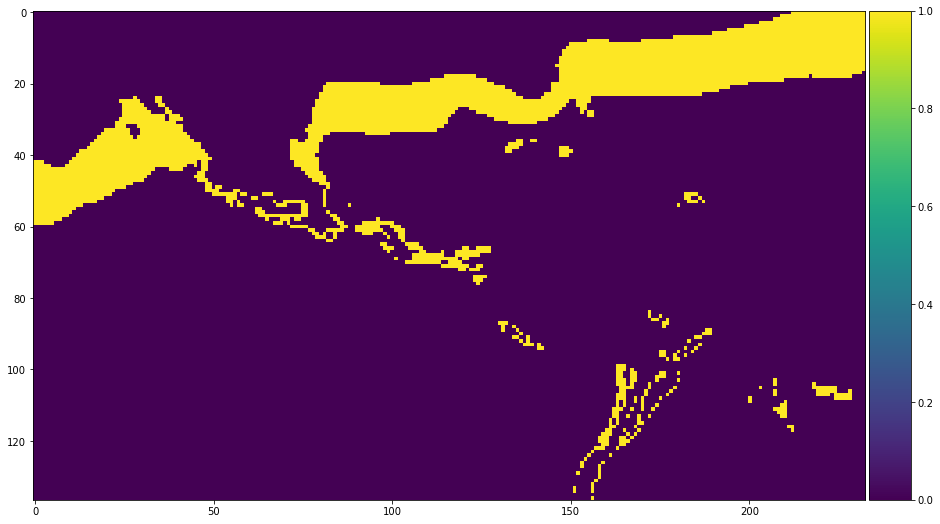

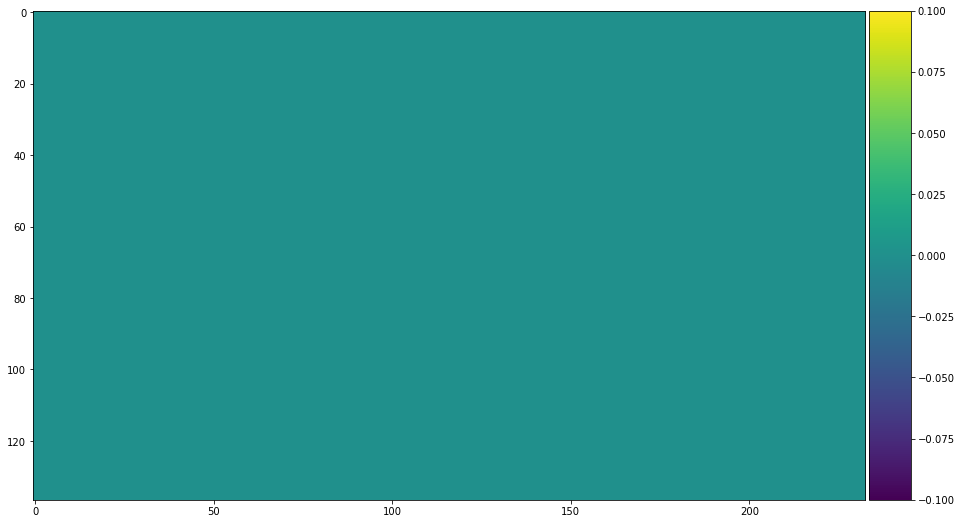

In [99]:
# Plot data
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
im1 = ax1.imshow(t2mf_mask[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
im1 = ax1.imshow(tp_mask[0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



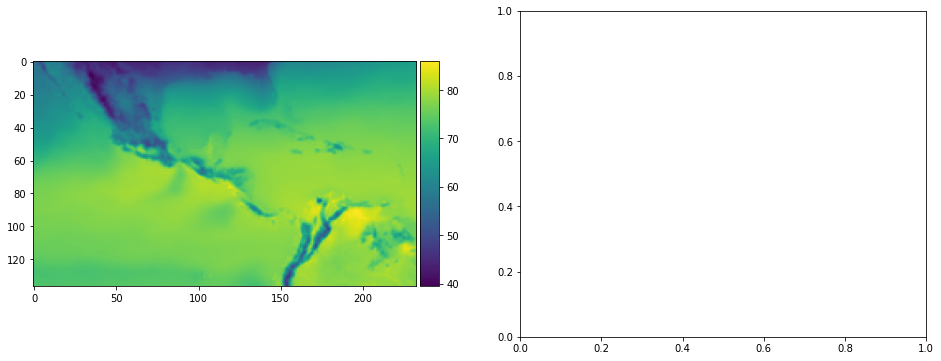

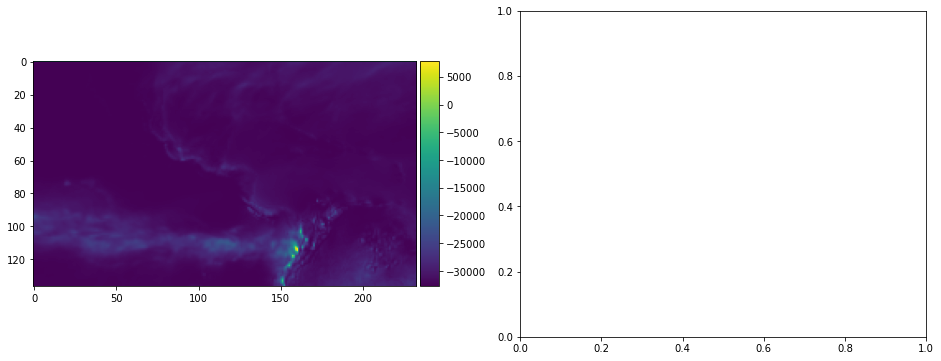

In [20]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(t2mf[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(cclim['tp'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



In [28]:
cof_lat = [19.477585598288215, 15.951339161580043, 15.17355242498728, 4.622913389125596, 20.762395445023337, 21.325342888979133]
cof_long = [-96.97046892217435,-96.4635391253275,-92.33612361801524,-75.59423450228476, -104.85486555253753, -105.00863721756717]
#cof_names = [‘Veracruz’,‘Oaxaca’,‘Chiapas’,‘Columbia’,‘Jalisco’,‘Nayarit’]

#Oaxaca_point = cclim.sel(latitude=15.951339161580043, longitude=-96.4635391253275, method='nearest')

# Next, find the index of the grid point nearest a specific lat/lon.  

cof_farms = cclim.sel(x = (cof_lat), y = (cof_long) ,method='nearest')






In [23]:
veracruz_point = cclim.sel(x=19.477585598288215, y=-96.97046892217435, method='nearest')

oaxaca_point = cclim.sel(x=15.951339161580043, y=-96.4635391253275, method='nearest')

chiapas_point = cclim.sel(x=15.17355242498728, y=-92.33612361801524, method='nearest')

colombia_point = cclim.sel(x=4.622913389125596, y=-75.59423450228476, method='nearest')

jalisco_point = cclim.sel(x=20.762395445023337, y=-104.85486555253753, method='nearest')

nayarit_point = cclim.sel(x=21.325342888979133, y=-105.00863721756717, method='nearest')



In [52]:
#print(oaxaca_point['t2m'].mean)
oax_temps = oaxaca_point['t2m'].mean

#print(veracruz_point['t2m'].mean)
veracruz_temps = veracruz_point['t2m'].mean
print(oax_temps)
print(veracruz_temps)

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 't2m' (time: 132)>
array([298.02823, 297.7338 , 298.28998, 297.887  , 298.385  , 299.1193 ,
       299.12866, 300.47314, 300.2836 , 299.79337, 299.3265 , 298.9734 ,
       297.8127 , 297.48557, 297.7068 , 298.28583, 298.69815, 298.6322 ,
       298.20532, 299.41895, 300.58426, 300.5178 , 300.50586, 298.7885 ,
       298.82175, 297.968  , 298.39383, 298.58804, 298.37305, 299.05334,
       298.14197, 298.79214, 299.3665 , 300.20673, 299.01648, 299.6791 ,
       298.8456 , 297.91452, 298.39694, 298.4717 , 298.56155, 298.67477,
       298.4764 , 299.85516, 301.9656 , 299.40283, 299.41064, 299.34155,
       297.8953 , 298.7937 , 298.2209 , 298.65607, 298.48315, 298.6753 ,
       299.0144 , 300.93478, 303.11795, 303.16315, 301.87006, 301.98898,
       302.07053, 299.51086, 299.08035, 298.9417 , 299.16656, 298.86795,
       299.00558, 299.99484, 299.30417, 300.43106, 300.30954, 298.4167 ,
       298.

In [64]:
Oax_10yr_mean = np.array([[298.02823, 297.7338 , 298.28998, 297.887  , 298.385  , 299.1193 ,
       299.12866, 300.47314, 300.2836 , 299.79337, 299.3265 , 298.9734 ,
       297.8127 , 297.48557, 297.7068 , 298.28583, 298.69815, 298.6322 ,
       298.20532, 299.41895, 300.58426, 300.5178 , 300.50586, 298.7885 ,
       298.82175, 297.968  , 298.39383, 298.58804, 298.37305, 299.05334,
       298.14197, 298.79214, 299.3665 , 300.20673, 299.01648, 299.6791 ,
       298.8456 , 297.91452, 298.39694, 298.4717 , 298.56155, 298.67477,
       298.4764 , 299.85516, 301.9656 , 299.40283, 299.41064, 299.34155,
       297.8953 , 298.7937 , 298.2209 , 298.65607, 298.48315, 298.6753 ,
       299.0144 , 300.93478, 303.11795, 303.16315, 301.87006, 301.98898,
       302.07053, 299.51086, 299.08035, 298.9417 , 299.16656, 298.86795,
       299.00558, 299.99484, 299.30417, 300.43106, 300.30954, 298.4167 ,
       298.09625, 298.19806, 298.08432, 298.28687, 299.52176, 299.1437 ,
       299.13437, 301.3658 , 300.8164 , 300.04004, 300.1496 , 298.882  ,
       298.116  , 298.6566 , 298.9365 , 297.8958 , 298.10303, 298.6109 ,
       298.748  , 300.05768, 300.7951 , 302.63138, 300.30072, 298.1212 ,
       298.36838, 298.23077, 299.49008, 298.8882 , 298.46912, 299.031  ,
       299.4963 , 300.33084, 301.5959 , 299.4371 , 299.52383, 298.74384,
       299.33948, 299.4475 , 299.75235, 298.52417, 298.68152, 298.8934 ,
       300.0499 , 301.29572, 300.9592 , 300.4425 , 299.3909 , 298.71527,
       297.92697, 298.32217, 298.04175, 298.54858, 298.89288, 298.60934,
       298.6057 , 299.3156 , 299.37793, 299.40076, 298.60416, 298.40887]])

np.mean((Oax_10yr_mean)- 273.15) * 9/5 + 32

78.96008750000004

In [65]:
Oax_10yr_mean

array([[298.02823, 297.7338 , 298.28998, 297.887  , 298.385  , 299.1193 ,
        299.12866, 300.47314, 300.2836 , 299.79337, 299.3265 , 298.9734 ,
        297.8127 , 297.48557, 297.7068 , 298.28583, 298.69815, 298.6322 ,
        298.20532, 299.41895, 300.58426, 300.5178 , 300.50586, 298.7885 ,
        298.82175, 297.968  , 298.39383, 298.58804, 298.37305, 299.05334,
        298.14197, 298.79214, 299.3665 , 300.20673, 299.01648, 299.6791 ,
        298.8456 , 297.91452, 298.39694, 298.4717 , 298.56155, 298.67477,
        298.4764 , 299.85516, 301.9656 , 299.40283, 299.41064, 299.34155,
        297.8953 , 298.7937 , 298.2209 , 298.65607, 298.48315, 298.6753 ,
        299.0144 , 300.93478, 303.11795, 303.16315, 301.87006, 301.98898,
        302.07053, 299.51086, 299.08035, 298.9417 , 299.16656, 298.86795,
        299.00558, 299.99484, 299.30417, 300.43106, 300.30954, 298.4167 ,
        298.09625, 298.19806, 298.08432, 298.28687, 299.52176, 299.1437 ,
        299.13437, 301.3658 , 300.8164

In [38]:
from numpy import c_

import numpy as np
import matplotlib.pyplot as plt
import random

n = 100000

x = np.random.standard_normal(n)
y = 3.0 * x + 2.0 * np.random.standard_normal(n)
x, y = np.loadtxt("Oaxaca3yr.txt",unpack=True)

plt.hist2d(x,y)

plt.title("Oaxaca 3 yr temp histogram")

plt.savefig("histogram_2d_01.png", bbox_inches='tight')

plt.close()

In [66]:
len(Oax_10yr_mean)

1

In [67]:
Oax_10yr_mean = np.array([298.02823, 297.7338 , 298.28998, 297.887  , 298.385  , 299.1193 ,
       299.12866, 300.47314, 300.2836 , 299.79337, 299.3265 , 298.9734 ,
       297.8127 , 297.48557, 297.7068 , 298.28583, 298.69815, 298.6322 ,
       298.20532, 299.41895, 300.58426, 300.5178 , 300.50586, 298.7885 ,
       298.82175, 297.968  , 298.39383, 298.58804, 298.37305, 299.05334,
       298.14197, 298.79214, 299.3665 , 300.20673, 299.01648, 299.6791 ,
       298.8456 , 297.91452, 298.39694, 298.4717 , 298.56155, 298.67477,
       298.4764 , 299.85516, 301.9656 , 299.40283, 299.41064, 299.34155,
       297.8953 , 298.7937 , 298.2209 , 298.65607, 298.48315, 298.6753 ,
       299.0144 , 300.93478, 303.11795, 303.16315, 301.87006, 301.98898,
       302.07053, 299.51086, 299.08035, 298.9417 , 299.16656, 298.86795,
       299.00558, 299.99484, 299.30417, 300.43106, 300.30954, 298.4167 ,
       298.09625, 298.19806, 298.08432, 298.28687, 299.52176, 299.1437 ,
       299.13437, 301.3658 , 300.8164 , 300.04004, 300.1496 , 298.882  ,
       298.116  , 298.6566 , 298.9365 , 297.8958 , 298.10303, 298.6109 ,
       298.748  , 300.05768, 300.7951 , 302.63138, 300.30072, 298.1212 ,
       298.36838, 298.23077, 299.49008, 298.8882 , 298.46912, 299.031  ,
       299.4963 , 300.33084, 301.5959 , 299.4371 , 299.52383, 298.74384,
       299.33948, 299.4475 , 299.75235, 298.52417, 298.68152, 298.8934 ,
       300.0499 , 301.29572, 300.9592 , 300.4425 , 299.3909 , 298.71527,
       297.92697, 298.32217, 298.04175, 298.54858, 298.89288, 298.60934,
       298.6057 , 299.3156 , 299.37793, 299.40076, 298.60416, 298.40887])
    
np.mean((Oax_10yr_mean)- 273.15) * 9/5 + 32

78.96008750000004

In [68]:
test_df = pd.DataFrame({"a": Oax_10yr_mean, "b": range(0, len(Oax_10yr_mean))})

In [72]:
test_df_f = ((test_df)- 273.15) * 9/5 + 32

<AxesSubplot:>

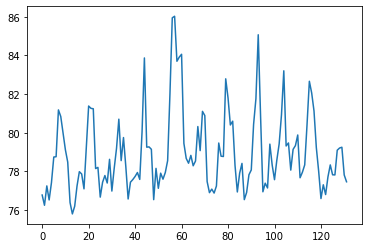

In [75]:
test_df_f.iloc[:,0].plot()